In [1]:
import pandas as pd

apt_price = pd.read_csv(
    "./apt_price_2022.csv",
    encoding="cp949" , # 한글문자셋 지정
    skiprows=15, # 앞부분 15줄 설명부분 삭제
    thousands=","  # 숫자사이 , 를 삭제
)

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,1997.0,동일로 752,NaN,중개거래,서울 중랑구
16943,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,1997.0,동일로 752,NaN,중개거래,서울 중랑구
16944,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,2003.0,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구"
16945,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,2003.0,동일로144길 74,NaN,중개거래,서울 중랑구


In [2]:
# apt_price["시군구"] 를 시,구,동으로 분할
apt_price["구"] = apt_price["시군구"].str.split().str[1]
apt_price["동"] = apt_price["시군구"].str.split().str[2]
apt_price.head()
# 전용면적을 평 변환
apt_price["평"] = round(apt_price["전용면적(㎡)"] / 3.03, 1)
# 거래금액 단위를 억원으로 변환
apt_price["거래금액_억원"] = apt_price["거래금액(만원)"] / 10000
# 계약년월 -> 계약년, 계약월로 분리
apt_price["계약년"] = apt_price["계약년월"] // 100 
apt_price["계약월"] = apt_price["계약년월"] % 100 
apt_price.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,도로명,해제사유발생일,거래유형,중개사소재지,구,동,평,거래금액_억원,계약년,계약월
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,...,언주로 3,NaN,-,-,강남구,개포동,26.4,22.0,2021,9
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.4,21.5,2021,12
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.4,22.0,2022,4
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.4,22.0,2022,4
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.4,21.6,2022,5


In [3]:
# 평정보를 이용하여 평형정보 생성
# 10평이하,10평대,20평대,30평대,40평대,40평이상
apt_price["평형"] = pd.cut(
    apt_price["평"],
    bins=[0,10,20,30,40,50,1000],
    labels="10평이하,10평대,20평대,30평대,40평대,40평이상".split(",")
)

In [13]:
import matplotlib.pyplot as plt
#시각화 한글처리
plt.rc("font", family="Malgun Gothic")

In [4]:
# 요일 추출
apt_price["계약요일"] = pd.to_datetime(
    apt_price["계약년월"].astype(str) + apt_price["계약일"].astype(str),
    format="%Y%m%d"
).dt.dayofweek

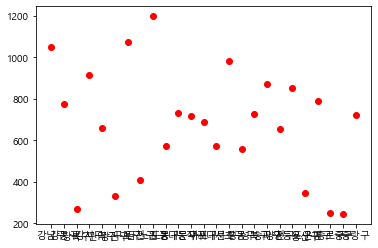

In [14]:
# 구별 계약건수
구별계약건수 = apt_price.groupby('구')[['층']].count()
plt.plot(
    구별계약건수.index,
    구별계약건수['층'],
    'ro')

Text(0, 0.5, '계약건수')

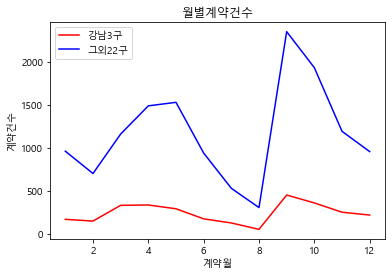

In [26]:
cond = apt_price['구'].isin(['강남구','서초구','송파구'])
월별계약건수_3구 = apt_price[cond].groupby('계약월')[['층']].count()
월별계약건수_22구 = apt_price[~cond].groupby('계약월')[['층']].count()
plt.plot(
    월별계약건수_3구.index,
    월별계약건수_3구['층'],
    'r-',
    label = '강남3구')
plt.plot(
    월별계약건수_22구.index,
    월별계약건수_22구['층'],
    'b-',
    label = '그외22구')
plt.legend()
plt.title('월별계약건수')
plt.xlabel('계약월')
plt.ylabel('계약건수')

(0.0, 50.0)

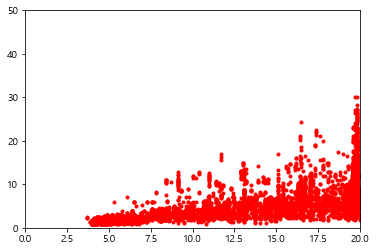

In [24]:
# 전용면적별 거래금액
plt.plot(
    apt_price['평'],
    apt_price['거래금액_억원'],
    'r.')
plt.xlim(0,20)
plt.ylim(0,50)

(0.5, 30.0)

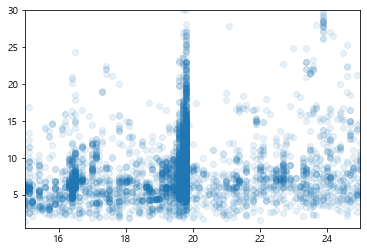

In [32]:
plt.scatter(
    apt_price['평'],
    apt_price['거래금액_억원'],
alpha=0.1
)
plt.xlim(15,25)
plt.ylim(0.5,30)

<BarContainer object of 25 artists>

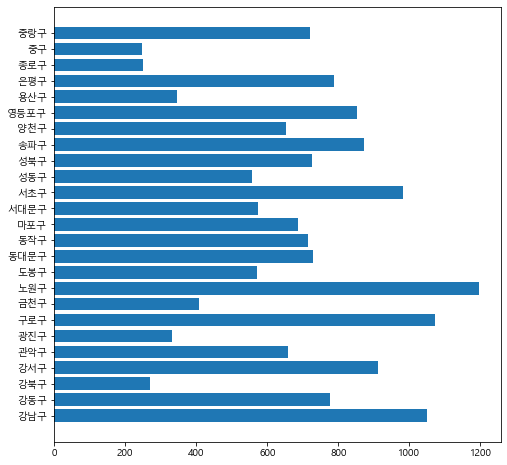

In [35]:
plt.figure(figsize=(8,8))
plt.barh(
    구별계약건수.index,
    구별계약건수['층']
)

(array([1.3848e+04, 2.3890e+03, 5.1300e+02, 1.2000e+02, 4.5000e+01,
        1.8000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([  0.76 ,  15.184,  29.608,  44.032,  58.456,  72.88 ,  87.304,
        101.728, 116.152, 130.576, 145.   ]),
 <BarContainer object of 10 artists>)

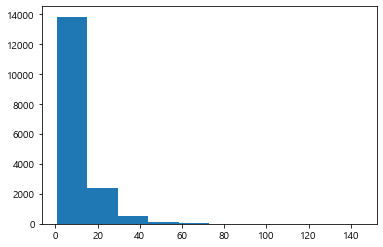

In [36]:
plt.hist(apt_price['거래금액_억원'])

In [37]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='평형', ylabel='거래금액_억원'>

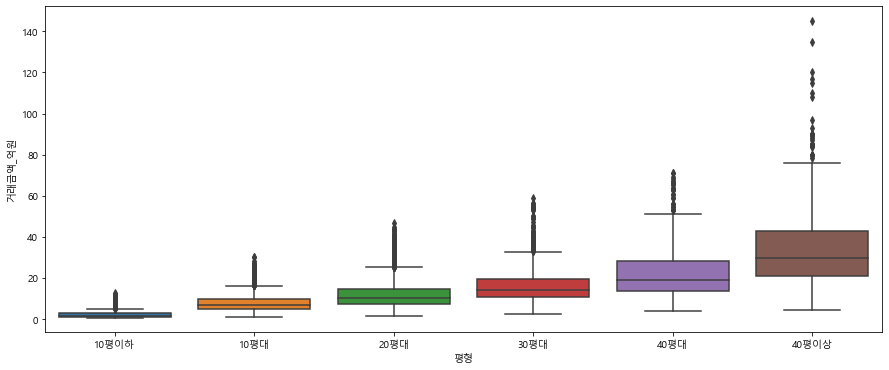

In [49]:
plt.figure(figsize=(15,6))
sns.boxplot(
    data=apt_price,
    x = '평형',
    y = '거래금액_억원')

<AxesSubplot:xlabel='계약월', ylabel='구'>

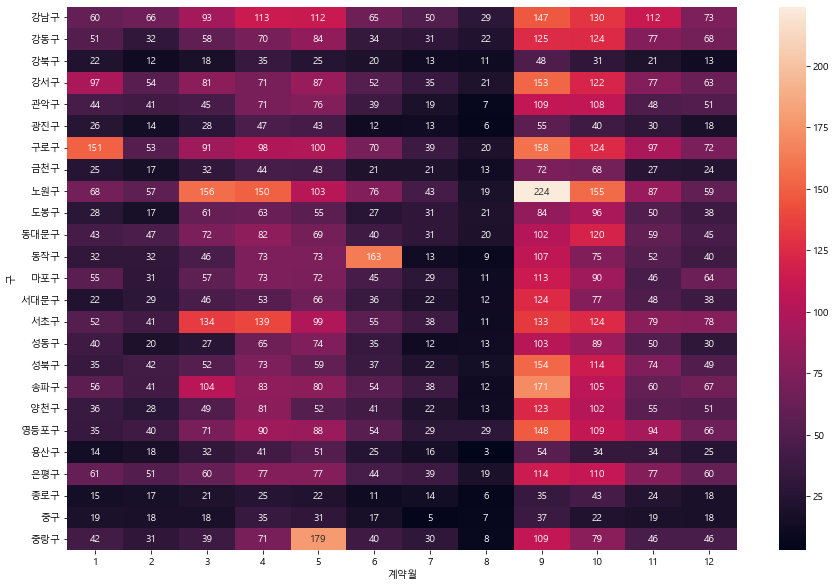

In [62]:
구별월별거래건수 = apt_price.pivot_table(
    index='구',
    columns='계약월',
    values= '층',
    aggfunc='count')
plt.figure(figsize=(15,10))
sns.heatmap(구별월별거래건수,annot=True,fmt='d')

<AxesSubplot:xlabel='계약월'>

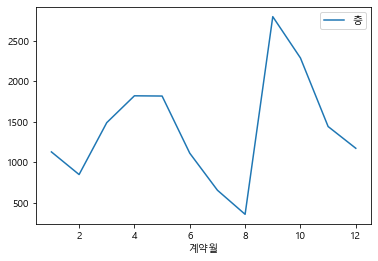

In [101]:
apt_price.groupby('계약월')[['층']].count().plot()

<AxesSubplot:xlabel='계약월'>

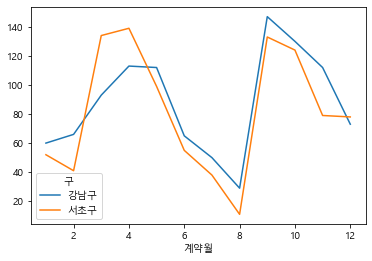

In [104]:
cond = apt_price['구'].isin(['강남구','서초구'])
apt_price[cond].pivot_table(
    index='계약월',
    columns='구',
    values = '평',
    aggfunc='count').plot()

<AxesSubplot:ylabel='강남구'>

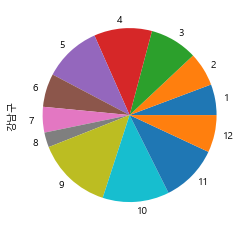

In [131]:
# 월별 강남3구와 그외지역 간 거래건수 시각화
cond = apt_price['구'].isin(['강남구','서초구','송파구'])
apt_price['지역구분'] = '일반'
apt_price.loc[cond,'지역구분'] = '강남3구'
apt_price.pivot_table(
    index='계약월',
    columns='구',
    values='평',
    aggfunc='count')['강남구'].plot.pie()

<AxesSubplot:>

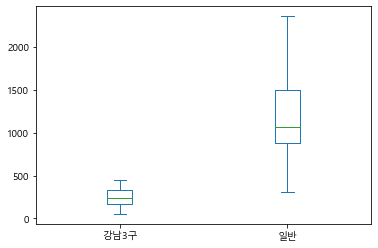

In [127]:
apt_price.pivot_table(
    index='계약월',
    columns='지역구분',
    values='평',
    aggfunc='count').plot.box()

<AxesSubplot:xlabel='지역구분', ylabel='거래금액_억원'>

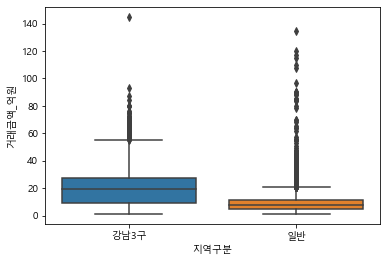

In [134]:
sns.boxplot(
    data=apt_price,
    y='거래금액_억원',
    x='지역구분')